In [31]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

In [21]:
df_salaries = pd.read_csv('salaries.csv')

In [22]:
df_salaries=df_salaries.drop(columns=['Unnamed: 0'],axis=1)

In [23]:
df_salaries

,rank,discipline,yrs.since.phd,yrs.service,sex,salary
0,Prof,B,19,18,Male,139750
1,Prof,B,20,16,Male,173200
2,AsstProf,B,4,3,Male,79750
3,Prof,B,45,39,Male,115000
4,Prof,B,40,41,Male,141500
...,...,...,...,...,...,...
392,Prof,A,33,30,Male,103106
393,Prof,A,31,19,Male,150564
394,Prof,A,42,25,Male,101738
395,Prof,A,25,15,Male,95329


In [13]:
df_salaries['rank'].unique()

array(['Prof', 'AsstProf', 'AssocProf'], dtype=object)

In [25]:
lm=LabelEncoder()
df_salaries['rank']=lm.fit_transform(df_salaries['rank'])
df_salaries['discipline']=lm.fit_transform(df_salaries['discipline'])
df_salaries['sex']=lm.fit_transform(df_salaries['sex'])

# Independent and dependent variables (using 'rank' as the target)
X = df_salaries.drop('rank', axis=1)
y = df_salaries['rank']

# Initialize lists to store results for Excel export


Test Size 0.3: Accuracy = 0.7667
Confusion Matrix for Test Size 0.3:
[[ 0  3 19]
 [ 0 12  3]
 [ 0  3 80]]

Classification Report for Test Size 0.3:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        22
           1       0.67      0.80      0.73        15
           2       0.78      0.96      0.86        83

    accuracy                           0.77       120
   macro avg       0.48      0.59      0.53       120
weighted avg       0.63      0.77      0.69       120


Test Size 0.4: Accuracy = 0.7610
Confusion Matrix for Test Size 0.4:
[[  0   4  26]
 [  0  13   5]
 [  0   3 108]]

Classification Report for Test Size 0.4:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00        30
           1       0.65      0.72      0.68        18
           2       0.78      0.97      0.86       111

    accuracy                           0.76       159
   macro avg       0.48      0.57      0.

D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\anaconda\Lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning:

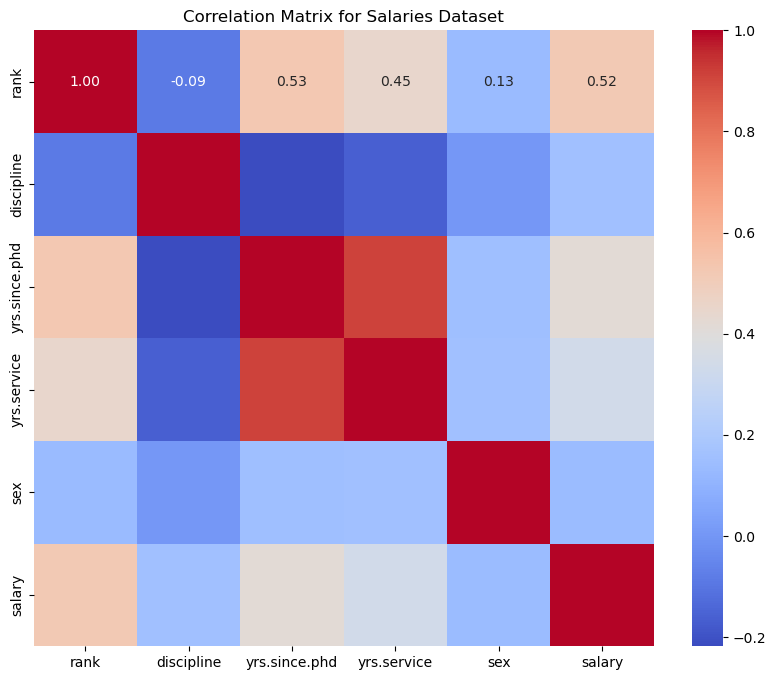

Logistic Regression results (test size, accuracy, confusion matrix, classification report) have been saved to 'salaries_logistic_regression_accuracy_multiclass_with_metrics.xlsx'


In [32]:
test_size_list = []
accuracy_list = []

# Splitting the data into train and test sets with different test sizes
test_sizes = [0.3, 0.4, 0.5]
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Model training
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store test size and accuracy for each test size
    test_size_list.append(test_size)
    accuracy_list.append(accuracy)

    # Print Accuracy for each test size
    print(f"Test Size {test_size}: Accuracy = {accuracy:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for Test Size {test_size}:\n{cm}\n")

    # Classification Report
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for Test Size {test_size}:\n{report}\n")

# Heatmap of correlation
corr = df_salaries.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix for Salaries Dataset")
plt.show()

# Prepare a DataFrame for Excel export
results_df = pd.DataFrame({
    'Test Size': test_size_list,
    'Accuracy': accuracy_list
})

# Write to Excel
results_df.to_excel('salaries_logistic_regression_accuracy_multiclass_with_metrics.xlsx', index=False)

print("Logistic Regression results (test size, accuracy, confusion matrix, classification report) have been saved to 'salaries_logistic_regression_accuracy_multiclass_with_metrics.xlsx'")


In [33]:
insurance = pd.read_csv("insurance.csv")

In [34]:
lm=LabelEncoder()
insurance['sex'] = lm.fit_transform(insurance['sex'])
insurance['smoker'] = lm.fit_transform(insurance['smoker'])
insurance['region'] = lm.fit_transform(insurance['region'])

Test Size 0.3: Accuracy = 0.9453
Confusion Matrix for Test Size 0.3:
[[312  11]
 [ 11  68]]

Classification Report for Test Size 0.3:
              precision    recall  f1-score   support

           0       0.97      0.97      0.97       323
           1       0.86      0.86      0.86        79

    accuracy                           0.95       402
   macro avg       0.91      0.91      0.91       402
weighted avg       0.95      0.95      0.95       402


Test Size 0.4: Accuracy = 0.9384
Confusion Matrix for Test Size 0.4:
[[410  20]
 [ 13  93]]

Classification Report for Test Size 0.4:
              precision    recall  f1-score   support

           0       0.97      0.95      0.96       430
           1       0.82      0.88      0.85       106

    accuracy                           0.94       536
   macro avg       0.90      0.92      0.91       536
weighted avg       0.94      0.94      0.94       536


Test Size 0.5: Accuracy = 0.9387
Confusion Matrix for Test Size 0.5:
[[504  

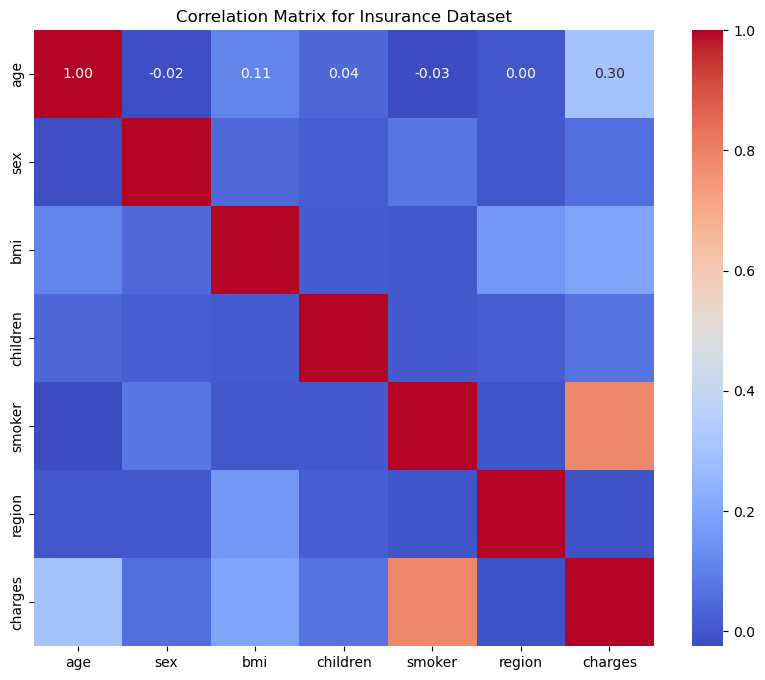

Logistic Regression results (test size, accuracy, confusion matrix, classification report) have been saved to 'insurance_logistic_regression_accuracy_multiclass_with_metrics.xlsx'


In [35]:
X = insurance.drop('smoker', axis=1)  # Drop 'smoker_yes' column as it's our target
y = insurance['smoker']  # Target variable

# Initialize lists to store results for Excel export
test_size_list = []
accuracy_list = []

# Splitting the data into train and test sets with different test sizes
test_sizes = [0.3, 0.4, 0.5]
for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=42)

    # Model training
    model = LogisticRegression(multi_class='multinomial', solver='lbfgs', max_iter=1000)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    
    # Store test size and accuracy for each test size
    test_size_list.append(test_size)
    accuracy_list.append(accuracy)

    # Print Accuracy for each test size
    print(f"Test Size {test_size}: Accuracy = {accuracy:.4f}")

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    print(f"Confusion Matrix for Test Size {test_size}:\n{cm}\n")

    # Classification Report
    report = classification_report(y_test, y_pred)
    print(f"Classification Report for Test Size {test_size}:\n{report}\n")

# Heatmap of correlation
corr = insurance.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Correlation Matrix for Insurance Dataset")
plt.show()

# Prepare a DataFrame for Excel export
results_df = pd.DataFrame({
    'Test Size': test_size_list,
    'Accuracy': accuracy_list
})

# Write to Excel
results_df.to_excel('insurance_logistic_regression_accuracy_multiclass_with_metrics.xlsx', index=False)

print("Logistic Regression results (test size, accuracy, confusion matrix, classification report) have been saved to 'insurance_logistic_regression_accuracy_multiclass_with_metrics.xlsx'")


Epoch 0: Cost = 0.6931471805599457
Epoch 100: Cost = nan
Epoch 200: Cost = nan
Epoch 300: Cost = nan
Epoch 400: Cost = nan


C:\Users\ranji\AppData\Local\Temp\ipykernel_25232\1205614015.py:14: RuntimeWarning: overflow encountered in exp
  h = 1 / (1 + np.exp(-z))
C:\Users\ranji\AppData\Local\Temp\ipykernel_25232\1205614015.py:17: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))
C:\Users\ranji\AppData\Local\Temp\ipykernel_25232\1205614015.py:17: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))
C:\Users\ranji\AppData\Local\Temp\ipykernel_25232\1205614015.py:14: RuntimeWarning: overflow encountered in exp
  h = 1 / (1 + np.exp(-z))
C:\Users\ranji\AppData\Local\Temp\ipykernel_25232\1205614015.py:17: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))
C:\Users\ranji\AppData\Local\Temp\ipykernel_25232\1205614015.py:14: RuntimeWarning: overflow encountered in exp
  h = 1 / (1 + np.exp(-z))
C:\Users\ranji\AppData\Local\Te

Epoch 500: Cost = nan
Epoch 600: Cost = nan
Epoch 700: Cost = nan
Epoch 800: Cost = nan
Epoch 900: Cost = nan
Test Size 0.3: Accuracy = 0.3209
Epoch 0: Cost = 0.6931471805599455
Epoch 100: Cost = nan


C:\Users\ranji\AppData\Local\Temp\ipykernel_25232\1205614015.py:17: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))
C:\Users\ranji\AppData\Local\Temp\ipykernel_25232\1205614015.py:14: RuntimeWarning: overflow encountered in exp
  h = 1 / (1 + np.exp(-z))
C:\Users\ranji\AppData\Local\Temp\ipykernel_25232\1205614015.py:17: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))
C:\Users\ranji\AppData\Local\Temp\ipykernel_25232\1205614015.py:14: RuntimeWarning: overflow encountered in exp
  h = 1 / (1 + np.exp(-z))
C:\Users\ranji\AppData\Local\Temp\ipykernel_25232\1205614015.py:17: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))
C:\Users\ranji\AppData\Local\Temp\ipykernel_25232\1205614015.py:14: RuntimeWarning: overflow encountered in exp
  h = 1 / (1 + np.exp(-z))
C:\Users\ranji\AppData\Local\Te

Epoch 200: Cost = nan
Epoch 300: Cost = nan
Epoch 400: Cost = nan
Epoch 500: Cost = nan
Epoch 600: Cost = nan
Epoch 700: Cost = nan
Epoch 800: Cost = nan


C:\Users\ranji\AppData\Local\Temp\ipykernel_25232\1205614015.py:14: RuntimeWarning: overflow encountered in exp
  h = 1 / (1 + np.exp(-z))
C:\Users\ranji\AppData\Local\Temp\ipykernel_25232\1205614015.py:17: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))
C:\Users\ranji\AppData\Local\Temp\ipykernel_25232\1205614015.py:17: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))
C:\Users\ranji\AppData\Local\Temp\ipykernel_25232\1205614015.py:14: RuntimeWarning: overflow encountered in exp
  h = 1 / (1 + np.exp(-z))
C:\Users\ranji\AppData\Local\Temp\ipykernel_25232\1205614015.py:14: RuntimeWarning: overflow encountered in exp
  h = 1 / (1 + np.exp(-z))
C:\Users\ranji\AppData\Local\Temp\ipykernel_25232\1205614015.py:17: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))
C:\Users\ranji\AppData\Local\Te

Epoch 900: Cost = nan
Test Size 0.4: Accuracy = 0.2388
Epoch 0: Cost = 0.6931471805599453
Epoch 100: Cost = nan
Epoch 200: Cost = nan
Epoch 300: Cost = nan
Epoch 400: Cost = nan
Epoch 500: Cost = nan


C:\Users\ranji\AppData\Local\Temp\ipykernel_25232\1205614015.py:17: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))
C:\Users\ranji\AppData\Local\Temp\ipykernel_25232\1205614015.py:14: RuntimeWarning: overflow encountered in exp
  h = 1 / (1 + np.exp(-z))
C:\Users\ranji\AppData\Local\Temp\ipykernel_25232\1205614015.py:17: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))
C:\Users\ranji\AppData\Local\Temp\ipykernel_25232\1205614015.py:14: RuntimeWarning: overflow encountered in exp
  h = 1 / (1 + np.exp(-z))
C:\Users\ranji\AppData\Local\Temp\ipykernel_25232\1205614015.py:17: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))
C:\Users\ranji\AppData\Local\Temp\ipykernel_25232\1205614015.py:14: RuntimeWarning: overflow encountered in exp
  h = 1 / (1 + np.exp(-z))
C:\Users\ranji\AppData\Local\Te

Epoch 600: Cost = nan
Epoch 700: Cost = nan
Epoch 800: Cost = nan
Epoch 900: Cost = nan
Test Size 0.5: Accuracy = 0.2182


C:\Users\ranji\AppData\Local\Temp\ipykernel_25232\1205614015.py:14: RuntimeWarning: overflow encountered in exp
  h = 1 / (1 + np.exp(-z))
C:\Users\ranji\AppData\Local\Temp\ipykernel_25232\1205614015.py:17: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))
C:\Users\ranji\AppData\Local\Temp\ipykernel_25232\1205614015.py:17: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))
C:\Users\ranji\AppData\Local\Temp\ipykernel_25232\1205614015.py:14: RuntimeWarning: overflow encountered in exp
  h = 1 / (1 + np.exp(-z))
C:\Users\ranji\AppData\Local\Temp\ipykernel_25232\1205614015.py:17: RuntimeWarning: divide by zero encountered in log
  cost = (-1/m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))
C:\Users\ranji\AppData\Local\Temp\ipykernel_25232\1205614015.py:14: RuntimeWarning: overflow encountered in exp
  h = 1 / (1 + np.exp(-z))
C:\Users\ranji\AppData\Local\Te

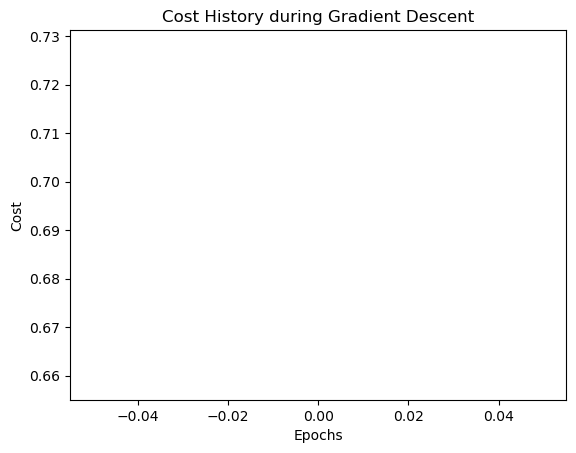

Gradient Descent Logistic Regression results (test size and accuracy) have been saved to 'insurance_gradient_descent_logistic_regression_accuracy.xlsx'


In [36]:
X_b = np.c_[np.ones((X.shape[0], 1)), X.values]  # Add a column of ones to X

# Gradient Descent function for Logistic Regression
def gradient_descent_logistic(X, y, lr=0.01, epochs=1000):
    m = len(y)
    theta = np.zeros(X.shape[1])  # Initialize weights
    cost_history = []

    for epoch in range(epochs):
        # Compute the linear combination
        z = X.dot(theta)
        
        # Sigmoid function
        h = 1 / (1 + np.exp(-z))
        
        # Compute cost (log loss)
        cost = (-1/m) * (y.dot(np.log(h)) + (1 - y).dot(np.log(1 - h)))
        cost_history.append(cost)

        # Gradient descent update
        gradient = (1/m) * X.T.dot(h - y)
        theta -= lr * gradient
        
        if epoch % 100 == 0:
            print(f"Epoch {epoch}: Cost = {cost}")

    return theta, cost_history

# Split the data into train and test sets with different test sizes
test_sizes = [0.3, 0.4, 0.5]
results = []

for test_size in test_sizes:
    X_train, X_test, y_train, y_test = train_test_split(X_b, y, test_size=test_size, random_state=42)

    # Run gradient descent
    theta_final, cost_history = gradient_descent_logistic(X_train, y_train)

    # Predictions
    y_pred_prob = 1 / (1 + np.exp(-X_test.dot(theta_final)))  # Probability predictions
    y_pred = (y_pred_prob >= 0.5).astype(int)  # Convert probabilities to binary predictions

    # Calculate accuracy
    accuracy = np.mean(y_pred == y_test)
    results.append((test_size, accuracy))

    print(f"Test Size {test_size}: Accuracy = {accuracy:.4f}")

# Plot the cost history
plt.plot(cost_history)
plt.xlabel('Epochs')
plt.ylabel('Cost')
plt.title('Cost History during Gradient Descent')
plt.show()

# Prepare a DataFrame for Excel export
results_df = pd.DataFrame(results, columns=['Test Size', 'Accuracy'])

# Write to Excel
results_df.to_excel('insurance_gradient_descent_logistic_regression_accuracy.xlsx', index=False)

print("Gradient Descent Logistic Regression results (test size and accuracy) have been saved to 'insurance_gradient_descent_logistic_regression_accuracy.xlsx'")
